In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [3]:
#Load the data and extract features for each sound file
x,y=[],[]
for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):
    file_name=os.path.basename(file)
    L=file_name.split('_')
    if L[2]=='angry.wav':
      e='angry'
    if L[2]=='disgust.wav':
      e='disgust'
    if L[2]=='fear.wav':
      e='fear'
    if L[2]=='happy.wav':
      e='happy'
    if L[2]=='neutral.wav':
      e='neutral'
    if L[2]=='ps.wav':
      e='ps'
    if L[2]=='sad.wav':
      e='sad'
    feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
    x.append(feature)
    y.append(e)

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -2.7465820e-04 ...  1.8310547e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  2.4414062e-04
  2.1362305e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.5869141e-03
 -1.1291504e-03 -1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.3569336e-04 -1.9226074e-03 ...  6.1035156e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ...  6.4086914e-04
  6.1035156e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00012207 ... -0.00015259 -0.00018311
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-04
  3.3569336e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ...  0.00061035  0.00036621
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ...  0.00024414  0.00015259
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00033569 -0.00042725 ...  0.00128174  0.0010376
  0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.0001220

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  3.0517578e-05 ... -4.8828125e-04
 -4.2724609e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 1.2207031e-04 1.5258789e-04 ... 1.8310547e-04 1.5258789e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  7.6293945e-04 ...  6.1035156e-04
  3.9672852e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00112915 -0.00463867 ...  0.00064087  0.00042725
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -1.5258789e-04
 -2.7465820e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -6.1035156e-05 ...  4.8828125e-04
  4.5776367e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  2.1362305e-04
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ...  5.1879883e-04
  3.0517578e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -1.8310547e-04
 -1.8310547e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -2.4414062e-04 ...  1.5258789e-04
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -3.0517578e-05 ... -9.1552734e-05
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -9.1552734e-05 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -2.7465820e-04
 -2.7465820e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.2207031e-04 ... -2.7465820e-04
 -3.0517578e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -1.2207031e-04
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 3.0517578e-05 ... 4.2724609e-04 3.0517578e-04
 2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ...  1.2207031e-04
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00018311 ...  0.00027466  0.00024414
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ... -1.5258789e-04
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  6.1035156e-05
  6.1035156e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00018311 ...  0.00119019  0.00079346
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -1.2207031e-04
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.8310547e-04 ... -9.1552734e-05
 -1.2207031e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.2207031e-04 ...  6.4086914e-04
  4.8828125e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.5258789e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -3.0517578e-04
 -2.7465820e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  2.4414062e-04
  2.7465820e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ... -1.0681152e-03
 -1.4343262e-03 -1.7700195e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.8310547e-04  9.1552734e-05 ... -6.1035156e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.5258789e-04 ...  9.1552734e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ...  6.1035156e-04
  4.8828125e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00024414 ...  0.00054932  0.00021362
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ...  3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 3.0517578e-05 ... 1.0681152e-03 8.5449219e-04
 4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.7395020e-03
  1.4648438e-03  8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  1.2207031e-04 ... -1.2207031e-04
 -3.0517578e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.8310547e-04  2.7465820e-04 ... -2.1362305e-04
 -2.1362305e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -9.4604492e-04
 -5.7983398e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  6.1035156e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -6.1035156e-05 ... -6.1035156e-04
 -5.1879883e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -1.8310547e-04
 -1.2207031e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 3.9672852e-04 4.8828125e-04
 2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ... -0.00018311 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  3.0517578e-05 ... -1.8310547e-04
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  9.1552734e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00146484 -0.00280762 ...  0.00024414  0.00045776
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 9.1552734e-05 ... 1.5258789e-04 9.1552734e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  7.6293945e-04
  5.4931641e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ... -1.5258789e-04
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ... -0.00015259 -0.00024414
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.2207031e-04 ...  6.1035156e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00042725 -0.00125122 ... -0.00033569 -0.00024414
 -0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -1.1901855e-03 ...  1.5258789e-04
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-04 -1.8310547e-04 ...  1.8310547e-04
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -9.1552734e-05 ...  2.1362305e-04
  1.8310547e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  1.9836426e-03
  1.6174316e-03  6.1035156e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00018311 -0.00204468 ...  0.00015259  0.00021362
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -3.6621094e-04 ...  2.4414062e-04
  3.0517578e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ...  3.0517578e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.5258789e-04 ... -9.1552734e-05
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00024414 -0.00045776 ... -0.00030518 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  6.1035156e-05 ... -7.9345703e-04
 -7.3242188e-04 -5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -9.1552734e-05 ... -1.2207031e-04
  6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -2.1362305e-04
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 9.1552734e-05 ... 1.8310547e-04 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.1362305e-04 -1.8310547e-04 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  3.0517578e-05
  4.2724609e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 1.2207031e-04 ... 6.1035156e-05 1.8310547e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -9.1552734e-05 ... -2.1362305e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.6621094e-04 -3.6621094e-04 ...  0.0000000e+00
 -6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -1.2207031e-04 ...  1.2207031e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 3.0517578e-05 ... 1.5258789e-04 1.5258789e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -3.9672852e-04
 -2.4414062e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -3.0517578e-05 ...  4.2724609e-04
  6.4086914e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00192261 -0.00192261 ...  0.00030518  0.00015259
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  1.8310547e-04
  1.5258789e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-04 -9.7656250e-04 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  9.1552734e-05 ... -2.1362305e-04
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ... -0.00048828 -0.00042725
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.2207031e-04  6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.00106812 0.00106812 ... 0.00079346 0.0005188  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -3.0517578e-05 ... -3.3569336e-04
 -3.6621094e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  0.0000000e+00
  6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  3.3569336e-04
  4.2724609e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 9.1552734e-05 ... 8.8500977e-04 4.8828125e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.00018311 0.00012207 ... 0.00015259 0.00012207 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  6.7138672e-04
  4.8828125e-04  5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 6.1035156e-05 1.5258789e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 1.2207031e-04 ... 3.3874512e-03 3.3264160e-03
 2.8686523e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 3.6621094e-04 3.0517578e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 2.7465820e-04 5.7983398e-04
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00253296 -0.00262451 ...  0.00021362  0.00012207
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ...  3.0517578e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  2.4414062e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  3.0517578e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ... -9.1552734e-05
  0.0000000e+00  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -3.3569336e-04
 -3.0517578e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -7.3242188e-04
 -4.8828125e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -6.1035156e-05 ... -2.4414062e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -3.0517578e-05
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.8310547e-04 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -2.1362305e-04 ...  1.8310547e-04
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -1.8310547e-04
 -2.7465820e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 9.1552734e-05 ... 1.2207031e-04 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.5258789e-04  1.2207031e-04 ...  6.1035156e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ... -6.1035156e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  0.0000000e+00 ...  6.4086914e-04
  5.4931641e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -1.5258789e-04
 -1.2207031e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
 -1.2207031e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00021362 ... -0.00027466 -0.00018311
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.5258789e-04 ...  9.1552734e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -9.1552734e-05 ... -2.1362305e-04
 -3.0517578e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  9.1552734e-05 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -9.1552734e-05
 -2.4414062e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.         0.00012207 ... 0.00180054 0.00128174 0.00238037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00015259  0.00018311 ... -0.00012207 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 1.2207031e-04 ... 1.2207031e-04 9.1552734e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ... -1.2207031e-04
 -9.1552734e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -2.1362305e-04
 -1.8310547e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00021362 ...  0.00039673  0.00033569
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ... -3.0517578e-05
 -9.1552734e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  1.2207031e-04 ... -6.1035156e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  9.1552734e-05 ... -1.5258789e-04
 -9.1552734e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ...  0.0000000e+00
 -1.2207031e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  6.1035156e-05 ... -6.1035156e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  9.1552734e-05 ... -6.1035156e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 3.3569336e-04 2.7465820e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05 -6.1035156e-05 ... -9.1552734e-05
 -9.1552734e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  1.2817383e-03 ...  1.2207031e-04
  1.5258789e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00024414 -0.00085449 ... -0.00033569 -0.00045776
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -9.1552734e-05 -9.7656250e-04 ...  4.2724609e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04  7.3242188e-04  5.7983398e-04 ... -9.1552734e-05
  3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5869141e-03  9.1552734e-05 -4.5776367e-04 ...  8.8500977e-04
  3.6621094e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00036621 -0.00030518 -0.00012207 ... -0.00012207  0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -3.0517578e-05 -1.2207031e-04 ...  3.3569336e-04
  5.4931641e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.4086914e-04 -1.1596680e-03 -3.3569336e-04 ... -5.7983398e-04
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05  5.4931641e-04 ... -3.0517578e-04
  1.5258789e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.3569336e-04  3.0517578e-05  1.8310547e-04 ... -1.8310547e-04
 -3.3569336e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -3.0517578e-05 -2.7465820e-04 ... -3.3569336e-04
 -3.0517578e-05  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  0.0000000e+00 ... -1.5258789e-04
 -1.5258789e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -6.1035156e-05 -1.0070801e-03 ...  2.7465820e-04
  2.1362305e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04  7.6293945e-04  6.1035156e-04 ... -5.4931641e-04
 -3.0517578e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  1.5258789e-04 -1.8310547e-04 ...  2.7465820e-04
  3.0517578e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.3569336e-04 -3.9672852e-04 ... -4.5776367e-04
 -2.4414062e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  2.7465820e-04 -5.1879883e-04 ...  3.0517578e-05
  3.6621094e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0005188   0.00039673 -0.00012207 ...  0.00091553  0.00042725
  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518 -0.0007019  -0.00106812 ...  0.00021362  0.00015259
  0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04  0.0000000e+00 ...  1.2207031e-04
 -2.1362305e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -1.8310547e-04 -3.0517578e-04 ... -2.4414062e-04
 -4.2724609e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-04  2.1362305e-04 -4.5776367e-04 ... -3.0517578e-04
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04  6.1035156e-05  0.0000000e+00 ... -9.1552734e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-04  9.1552734e-05 ... -2.4414062e-04
 -1.2207031e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 1.5258789e-04 2.4414062e-04 ... 1.2207031e-04 2.1362305e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00021362 0.00012207 0.00036621 ... 0.00036621 0.00030518 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -9.1552734e-05 -2.7465820e-04 ... -4.2724609e-04
 -1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.4414062e-04 -6.1035156e-05  3.0517578e-05 ... -4.2724609e-04
 -2.1362305e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -2.7465820e-04 ...  2.7465820e-04
 -1.2207031e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  0.0000000e+00 -3.9672852e-04 ... -1.5258789e-04
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -5.1879883e-04 -3.6621094e-04 ...  2.1362305e-04
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  2.1362305e-04  1.5258789e-04 ... -3.3569336e-04
 -2.7465820e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  0.0000000e+00 -3.0517578e-04 ... -1.2207031e-04
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00015259  0.00018311 ... -0.00012207 -0.00015259
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  2.1362305e-04  3.9672852e-04 ... -2.4414062e-04
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  9.1552734e-05 ... -3.0517578e-05
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-4.5776367e-04 -3.0517578e-04  0.0000000e+00 ... -2.4414062e-04
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05 -2.1362305e-04 ...  3.0517578e-04
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  2.1362305e-04 -1.8310547e-04 ...  3.9672852e-04
  2.4414062e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  1.2207031e-04 -6.1035156e-05 ...  2.4414062e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  3.9672852e-04  3.6621094e-04 ... -6.1035156e-05
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -2.4414062e-04 ... -3.0517578e-04
 -1.5258789e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  3.0517578e-05  1.5258789e-04 ... -1.2207031e-04
  9.1552734e-05  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.9672852e-04  0.0000000e+00 ...  7.0190430e-04
  1.1596680e-03  7.0190430e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00027466  0.00012207  0.00021362 ... -0.00021362 -0.00015259
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -2.1362305e-04 -1.5258789e-04 ... -3.3569336e-04
 -2.1362305e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00039673 -0.00067139 -0.00036621 ... -0.00094604 -0.00088501
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00061035  0.00033569 ... -0.00094604 -0.00076294
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00018311 -0.00018311 ...  0.00021362  0.00036621
  0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -6.103

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00265503 -0.00250244 ...  0.          0.00024414
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00015259 -0.00039673 -0.00158691 ...  0.00067139  0.00067139
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -1.5258789e-04 ... -3.9672852e-04
 -4.2724609e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-04 1.8310547e-04 9.1552734e-05 ... 3.9672852e-04 3.6621094e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-03  2.1362305e-04 -1.5563965e-03 ... -4.8828125e-04
 -2.4414062e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.6621094e-04  6.1035156e-04 ... -4.5776367e-04
 -3.6621094e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.8828125e-04 -8.2397461e-04 -1.2512207e-03 ...  3.9672852e-04
  1.2207031e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -5.4931641e-04 -9.7656250e-04 ... -4.2724609e-04
 -3.3569336e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00015259 -0.00018311 -0.00079346 ...  0.00067139  0.00143433
  0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-04 -3.0517578e-05 -4.2724609e-04 ... -3.0517578e-04
 -1.8310547e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04 -4.2724609e-04 -1.1596680e-03 ...  1.8310547e-04
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.0893555e-03  7.9345703e-04 -5.8288574e-03 ... -1.4953613e-03
 -7.3242188e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00033569 -0.00073242 -0.0010376  ... -0.00042725 -0.00015259
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05  4.2724609e-04 ... -3.6621094e-04
 -9.1552734e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04  3.0517578e-05 ... -1.8310547e-04
  0.0000000e+00 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 7.0190430e-04  9.1552734e-05 -9.1552734e-04 ... -1.4038086e-03
 -2.7465820e-03 -1.5563965e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.1596680e-03  6.7138672e-04 -1.0070801e-03 ... -7.0190430e-04
 -2.4414062e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00045776 -0.00061035 ...  0.00097656  0.00094604
  0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.5776367e-04 -7.6293945e-04 -1.0375977e-03 ...  1.5258789e-04
  4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -5.1879883e-04 ...  5.1879883e-04
  3.6621094e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00100708 -0.00387573 ...  0.00079346  0.00064087
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.0005188  -0.00189209 ... -0.00079346 -0.0010376
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.3193359e-03  3.3569336e-03  6.1035156e-05 ... -4.8828125e-04
  7.9345703e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.3569336e-04 -1.2207031e-04 ...  2.1362305e-04
  3.0517578e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWar

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00100708 -0.00012207 -0.00164795 ...  0.00134277  0.00097656
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00201416 -0.00479126 -0.00509644 ... -0.00177002 -0.00311279
  0.00259399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00100708 -0.00421143 -0.00463867 ...  0.00067139  0.00024414
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-04 -6.866

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 7.9345703e-04 -1.2207031e-04 -3.2348633e-03 ... -5.4931641e-04
 -4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00024414 -0.00027466 ... -0.0005188  -0.00030518
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.7983398e-04 -1.0070801e-03 -6.7138672e-04 ...  1.5258789e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00021362 -0.00021362 ...  0.00195312  0.00222778
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00152588 -0.00100708 -0.0017395  ... -0.0005188  -0.00039673
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.0012207  -0.00378418 -0.00375366 ...  0.          0.00082397
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00039673 -0.001647

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  2.7465820e-04 -9.1552734e-05 ...  7.0190430e-04
  4.5776367e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -5.7983398e-04  1.8310547e-04 ...  1.0681152e-03
  4.2724609e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00091553 -0.00430298 -0.00271606 ... -0.00106812 -0.0010376
 -0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWar

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00061035 -0.00048828 -0.00012207 ...  0.00161743  0.00152588
  0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  2.7465820e-04 ...  9.1552734e-05
 -2.4414062e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -1.2207031e-04 ... -2.1362305e-04
 -2.4414062e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8310547e-04 -3.0517578e-05 -2.4414062e-04 ... -4.5776367e-04
 -1.8310547e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-04  3.0517578e-05 -3.0517578e-04 ...  6.1035156e-04
 -3.1738281e-03  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.00012207 -0.00012207 ...  0.00079346  0.00082397
  0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -1.5258789e-04  3.0517578e-05 ...  3.3569336e-04
  4.2724609e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00024414 -0.00018311 ...  0.00134277  0.0010376
  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -4.8828125e-04 -3.0517578e-04 ...  3.0517578e-04
  9.1552734e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWar

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -9.1552734e-05  3.0517578e-05 ... -2.4414062e-04
  0.0000000e+00  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00021362  0.         -0.00024414 ...  0.00024414  0.00027466
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00024414 -0.00036621 ...  0.00021362  0.00024414
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  2.7465820e-04  3.0517578e-04 ...  4.2724609e-04
  3.0517578e-05  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -4.5776367e-04  3.0517578e-05 ... -3.0517578e-04
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05  0.0000000e+00 ...  1.2207031e-04
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00027466 -0.00039673 ...  0.00021362  0.00021362
  0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.2207031e-04  1.5258789e-04 ...  6.7138672e-04
  2.4414062e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00015259 -0.00024414 -0.00030518 ...  0.00015259  0.00027466
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  6.1035156e-05  2.1362305e-04 ... -1.2207031e-04
  3.0517578e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04 -9.1552734e-05  3.0517578e-05 ...  6.7138672e-04
  4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.8500977e-04  3.9672852e-04 -2.1362305e-04 ...  3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -3.6621094e-04 ... -3.6621094e-04
 -4.2724609e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.0005188  -0.00048828 ...  0.00112915  0.00100708
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -3.6621094e-04 -2.4414062e-04 ...  9.1552734e-05
  3.0517578e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00018311 -0.00015259 ... -0.0007019  -0.00048828
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  1.2207031e-04  3.9672852e-04 ... -6.7138672e-04
 -1.5258789e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414 -0.00073242 -0.00024414 ... -0.00015259 -0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00030518 0.00039673 0.00042725 ... 0.00115967 0.0012207  0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  2.7465820e-04  1.0986328e-03 ...  1.3427734e-03
  1.0986328e-03  6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 2.1362305e-04 1.2207031e-04 ... 5.4931641e-04 4.2724609e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -2.4414062e-04 -4.5776367e-04 ... -6.1035156e-04
 -5.4931641e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[2.1362305e-04 1.2207031e-04 1.5258789e-04 ... 1.2207031e-04 3.3569336e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -9.1552734e-05  6.1035156e-05 ... -1.7700195e-03
 -8.5449219e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.1879883e-04 -3.0517578e-05 -8.2397461e-04 ... -3.0517578e-04
 -1.8310547e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -3.0517578e-04 ... -3.3569336e-04
 -1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -9.1552734e-05 ... -5.4931641e-04
 -5.7983398e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05 -3.3569336e-04 ... -5.4931641e-04
 -1.2207031e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -7.0190430e-04 -2.0751953e-03 ... -5.7983398e-04
 -4.8828125e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.3569336e-04 -2.4414062e-04 -6.1035156e-05 ...  9.1552734e-05
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00 -1.2512207e-03 ... -1.4648438e-03
 -7.9345703e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -6.1035156e-05 -9.1552734e-05 ...  5.4931641e-04
  3.0517578e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  8.2397461e-04  1.1291504e-03 ... -2.4414062e-04
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-04  6.4086914e-04  2.2277832e-03 ... -4.8828125e-04
 -5.4931641e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.00054932  0.00036621 ...  0.00018311  0.00015259
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  3.0517578e-05  1.8310547e-04 ... -1.5258789e-04
 -1.8310547e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-04  9.1552734e-05 -1.2207031e-04 ... -9.1552734e-04
 -8.2397461e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.9672852e-04 -3.9672852e-04 ...  4.8828125e-04
  4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00024414 0.00054932 0.00057983 ... 0.00085449 0.00024414 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  0.0000000e+00  1.2207031e-04 ... -2.1362305e-04
 -4.8828125e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  4.2724609e-04 -6.1035156e-05 ... -1.5258789e-04
 -1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04 -6.1035156e-05 -1.5258789e-04 ...  2.1362305e-04
  2.4414062e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -5.7983398e-04 -5.1879883e-04 ... -3.3569336e-04
 -4.2724609e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.3569336e-04  8.2397461e-04  7.3242188e-04 ... -9.1552734e-05
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -4.8828125e-04 -4.5776367e-04 ... -2.7465820e-04
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414 -0.00039673 -0.00024414 ... -0.00119019 -0.00088501
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  3.6621094e-04 -9.1552734e-05 ... -3.0517578e-05
 -1.8310547e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -1.8310547e-04 -9.1552734e-05 ...  1.2207031e-04
  1.2207031e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-04  4.5776367e-04  4.5776367e-04 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -1.0375977e-03
 -4.2724609e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.3569336e-04 1.5258789e-04 3.0517578e-05 ... 6.1035156e-05 9.1552734e-05
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05 -2.4414062e-04 ...  9.1552734e-05
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  2.1362305e-04  3.0517578e-04 ... -2.7465820e-04
 -3.3569336e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  0.0000000e+00 -1.0070801e-03 ...  1.8310547e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.7656250e-04  5.4931641e-04  6.7138672e-04 ... -1.5258789e-04
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  1.5258789e-04  2.4414062e-04 ...  1.2207031e-04
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.1362305e-04 -2.4414062e-04 ...  3.0517578e-04
 -2.7465820e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00045776  0.00021362  0.00033569 ... -0.00094604 -0.00048828
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00033569  0.00064087  0.00042725 ... -0.00039673 -0.00042725
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -2.1362305e-04 -1.8310547e-04 ... -1.2207031e-04
 -9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.

In [7]:
data = pd.DataFrame(x)


In [8]:
data['labels'] = y

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,labels
0,-390.031342,55.235970,-15.034650,-10.704582,-6.318041,9.424743,-20.741861,-12.001624,-7.151769,-7.919952,...,0.000252,0.000238,0.000325,0.000546,0.000537,0.000451,0.000674,0.081048,0.024278,angry
1,-451.019470,67.048828,-0.448257,-16.812130,-14.137628,12.182584,-8.768965,-0.833088,-12.662774,1.033061,...,0.000124,0.000112,0.000058,0.000057,0.000085,0.000112,0.000097,0.085180,0.013152,angry
2,-406.563324,28.609005,-5.317216,2.124631,-3.238453,5.009407,-20.190369,-2.519338,-12.905815,-1.877587,...,0.000257,0.000201,0.000168,0.000156,0.000227,0.000304,0.000391,0.127679,0.017265,angry
3,-386.340027,53.439655,-8.663545,-13.309978,-5.566481,8.417089,-18.068228,-11.134800,-10.535916,-8.044547,...,0.000347,0.000312,0.000255,0.000295,0.000303,0.000309,0.000431,0.105919,0.025166,angry
4,-404.784882,54.462566,3.355290,10.967580,2.167007,6.005213,-25.438646,4.935778,-12.994334,-16.313234,...,0.000141,0.000086,0.000082,0.000099,0.000090,0.000159,0.000155,0.076019,0.017999,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-394.873291,62.498318,32.779137,44.080086,0.918849,6.047891,2.633442,-11.760519,-2.184762,-0.733423,...,0.005432,0.006786,0.006034,0.004669,0.003465,0.001961,0.001455,0.158452,0.018571,sad
2796,-408.074982,78.598412,25.725410,40.586464,4.817810,-1.951031,-2.863269,-14.771482,-1.381032,-5.383074,...,0.004247,0.002787,0.004449,0.005100,0.003099,0.001494,0.001193,0.111386,0.022565,sad
2797,-373.340851,66.174812,36.591633,43.172482,-0.954313,1.597513,2.557946,-10.045110,-0.070753,-2.613333,...,0.005348,0.002639,0.001861,0.001193,0.001305,0.000893,0.000977,0.161437,0.025561,sad
2798,-427.184509,70.532188,28.011265,38.867535,-1.237222,10.957751,1.877701,-13.284457,-2.604404,-1.738057,...,0.003278,0.003203,0.001451,0.001077,0.000660,0.000362,0.000448,0.111812,0.017214,sad


In [11]:
data.to_csv('tessdata.csv', index = False)
data.to_csv('tessdata2.csv')


In [12]:
data_unlabeled = data.drop(columns = 'labels', axis = 0)
X = data_unlabeled

In [13]:
X.columns = X.columns.map(str)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [15]:
#scaler = StandardScaler() 
#scaled_df = scaler.fit_transform(data_unlabeled) 
  
# Normalizing the Data 
#normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
#normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)


,P1,P2
0,-25.602743,-36.579848
1,36.611782,-42.652605


In [16]:
X_principal

,P1,P2
0,-25.602743,-36.579848
1,36.611782,-42.652605
2,-15.182048,-39.903146
3,-28.433959,-34.210115
4,-8.676380,-40.310450
...,...,...
2795,-11.849067,26.897182
2796,3.971863,32.238981
2797,-31.691127,25.823365
2798,20.921474,23.926387


In [17]:
X = X_principal

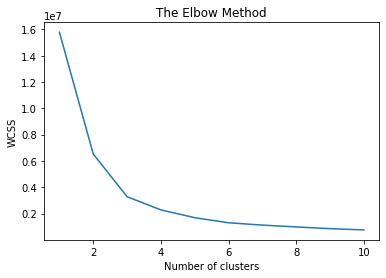

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'FEATURE 2')

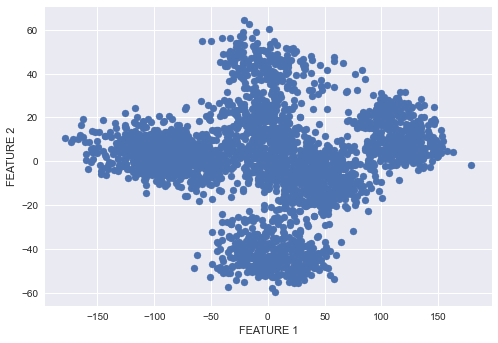

In [19]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['P1'], X['P2'])
plt.xlabel('FEATURE 1')
plt.ylabel('FEATURE 2')

In [31]:
kmeansmodel = KMeans(n_clusters=5 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

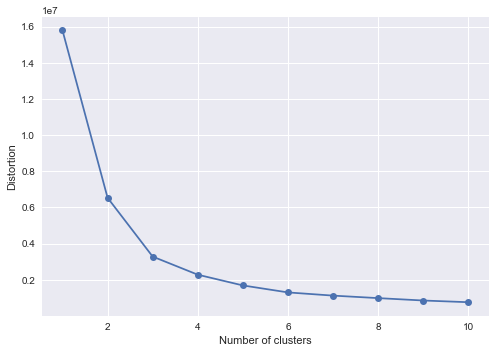

In [32]:
x = X

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

In [47]:
mdf = pd.DataFrame()
mdf['km'] = y_kmeans
mdf['acc'] = y
mdf

,km,acc
0,0,angry
1,0,angry
2,0,angry
3,0,angry
4,0,angry
...,...,...
2795,3,sad
2796,3,sad
2797,3,sad
2798,3,sad


In [34]:
x = np.array(x)

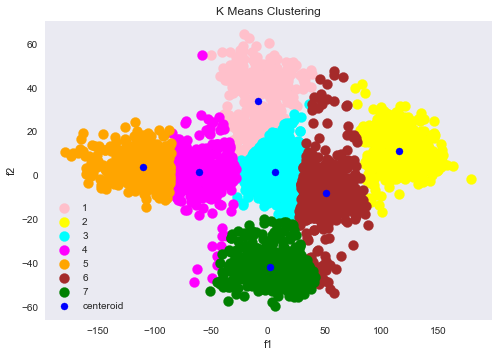

In [37]:
km = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = '1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = '2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = '3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = '4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = '5')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 100, c = 'brown', label = '6')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 100, c = 'green', label = '7')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.grid()
plt.show();

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['labels'] = le.fit_transform(data['labels'])
y = le.transform(y)

In [59]:
labels = kmeans.labels_

In [60]:
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 366 out of 2800 samples were correctly labeled.


In [61]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.13


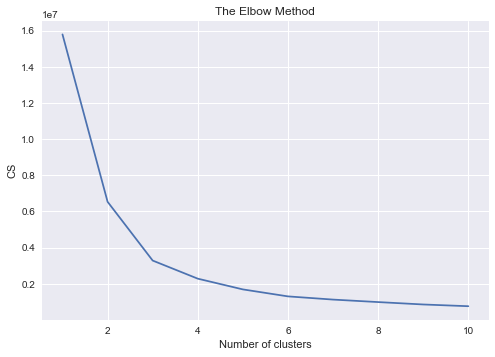

In [62]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 490 out of 2800 samples were correctly labeled.
Accuracy score: 0.17


In [70]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 490 out of 2800 samples were correctly labeled.
Accuracy score: 0.17


In [ ]:
# changed plotly and np" 5.8.3  to  5.3.0  / 1.22.2 to 1.21.4

In [127]:
np.__version__

'1.22.2'

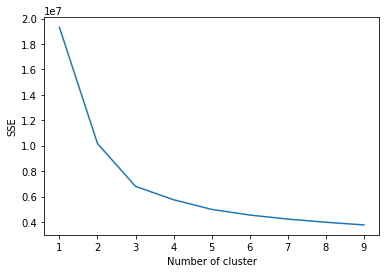

In [75]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [13]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")

NameError: name 'sse' is not defined

In [59]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [14]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [15]:
kl.elbow

3

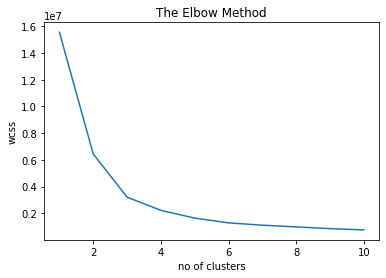

In [16]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
kmeansmodel = KMeans(n_clusters= 7, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [69]:
mdf = pd.DataFrame()
mdf['km'] = y_kmeans
mdf['acc'] = y


,km,acc
0,5,angry
1,5,angry
2,5,angry
3,5,angry
4,5,angry
...,...,...
2795,6,sad
2796,6,sad
2797,6,sad
2798,3,sad


In [52]:
X = np.array(X)

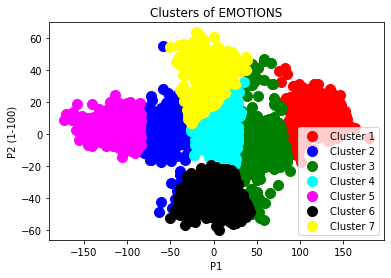

In [55]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'yellow', label = 'Cluster 7')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of EMOTIONS')
plt.xlabel('P1')
plt.ylabel('P2 (1-100)')
plt.legend()
plt.show()

In [28]:
X[y_kmeans == 0, 0]

array([-24.85691689,  36.24902588, -14.83637101, ..., -31.975926  ,
        20.48389346,   2.90389026])

In [29]:
X[y_kmeans == 0, 1]

array([-34.78232815, -42.2798457 , -39.45696295, ...,  24.97170517,
        23.4248789 ,  24.08938115])